# Introduction

In this project, the Breast Tissue Measurements dataset is being explored and analyzed through various stages of data analysis and clustering techniques. The project is structured into multiple notebooks, each focusing on different aspects and methodologies to provide a comprehensive understanding of the dataset and to derive meaningful insights.

## Previous Notebook

The first notebook focused on **Exploratory Data Analysis (EDA)**. Detailed analysis and visualizations were performed to understand the dataset's structure, distributions, and relationships between variables. The notebook can be accessed [here](https://www.kaggle.com/code/tarktunataalt/exploring-breast-tissue-data-eda-insights).

## Current Notebook

This notebook aims to apply **Principal Component Analysis (PCA)** and determine the appropriate distance metrics for subsequent clustering analyses. The goals of this notebook include:
- Applying PCA to reduce the dimensionality of the dataset.
- Identifying the most informative components.
- Evaluating the Euclidean and Manhattan distance metrics on both PCA-transformed and scaled data.
- Determining the optimal combination of data transformation and distance metric for clustering.

Through these steps, the most suitable data transformation and distance metric for clustering will be identified, which will ensure the clarity and distinctiveness of cluster formation.

It is important to note that the `factoextra` library, which is essential for some visualizations and analyses, is not available on Kaggle. Therefore, the code for these parts was executed locally and the results were uploaded. Those who wish to run the code themselves are advised to download and run it on their local machines.


## Future Notebooks

The subsequent notebooks will delve into various clustering techniques using the identified optimal settings:
- **K-Means Clustering**: Applying the K-Means algorithm to the dataset to find the optimal number of clusters and analyze their characteristics.
- **K-Medoids Clustering**: Implementing the K-Medoids algorithm and comparing its performance with K-Means.
- **Hierarchical Clustering**: Performing hierarchical clustering and visualizing the dendrogram to understand the clustering hierarchy.
- **Hierarchical K-Means Clustering**: Combining hierarchical clustering with K-Means to refine clusters for improved results.
- **Model-Based Clustering**: Using Gaussian Mixture Models (GMM) and other model-based techniques to analyze the data under different assumptions.
- **Density-Based Clustering**: Exploring density-based methods like DBSCAN to identify clusters based on data density.
- **Selecting the Optimal Clustering Method**: Comparing the results of different clustering techniques and using cluster validation metrics to select the best method.

Each notebook will build on the findings of the previous ones, ensuring a systematic and thorough analysis of the Breast Tissue Measurements dataset.


In [47]:
library(factoextra)
library(dplyr)
library(tibble)
library(corrplot)
library(stats)
library(gridExtra)

data <- read.csv("/kaggle/input/breast-tissue-impedance-measurements/data.csv")


# PCA

## Explained Variance

In [48]:
scaled_pca_data <- prcomp(data[,2:10], center = TRUE, scale. = TRUE)
summary(scaled_pca_data)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.337 1.3457 0.88245 0.71130 0.53358 0.31524 0.2304
Proportion of Variance 0.607 0.2012 0.08652 0.05622 0.03163 0.01104 0.0059
Cumulative Proportion  0.607 0.8082 0.89477 0.95098 0.98262 0.99366 0.9996
                           PC8     PC9
Standard deviation     0.05552 0.02986
Proportion of Variance 0.00034 0.00010
Cumulative Proportion  0.99990 1.00000

## Scree Plot

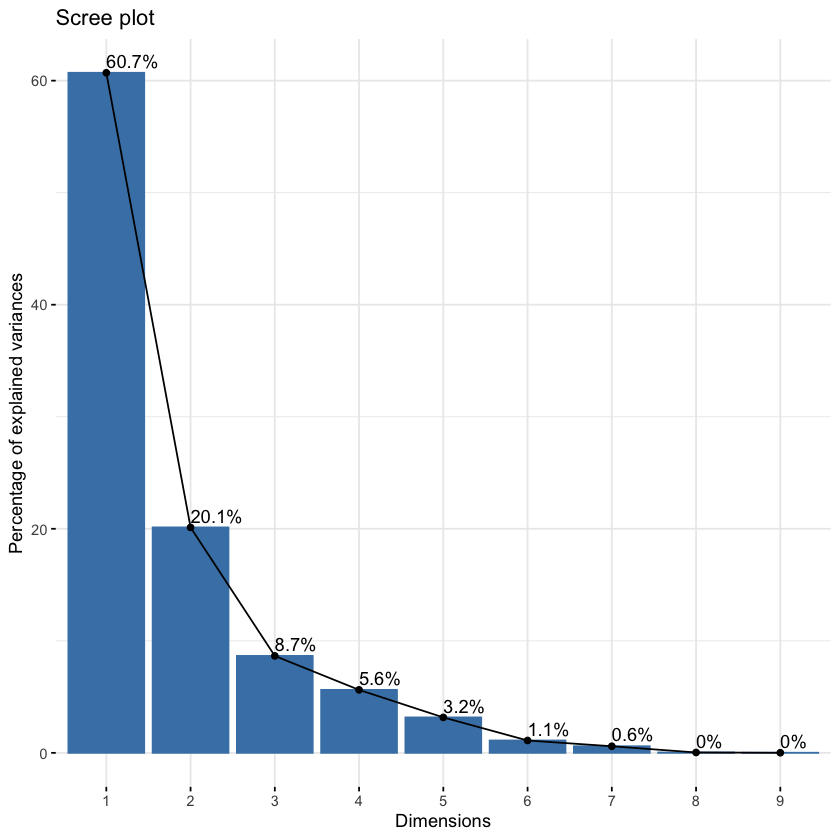

In [49]:
fviz_eig(scaled_pca_data, addlabels = TRUE)

This scree plot displays the percentage of explained variance by each principal component. It can be observed that the first two dimensions explain a significant portion of the variance, with 60.7% and 20.1% respectively, summing up to 80.8%. Therefore, selecting 2 dimensions captures more than 80% of the data's variability. While this is a substantial amount, considering the third dimension, which adds an additional 8.7% of explained variance, might also be beneficial. However, the final decision on the number of dimensions will be made based on the eigenvalues.








## Eigenvalues and Variance

In [50]:
get_eigenvalue(scaled_pca_data)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,5.4631379933,60.701533259,60.70153
Dim.2,1.8110302787,20.122558653,80.82409
Dim.3,0.7787176499,8.652418332,89.47651
Dim.4,0.5059486116,5.621651239,95.09816
Dim.5,0.2847108228,3.163453587,98.26162
Dim.6,0.0993785442,1.104206046,99.36582
Dim.7,0.0531027192,0.590030214,99.95585
Dim.8,0.0030820416,0.034244907,99.99010
Dim.9,0.0008913387,0.009903763,100.00000


Based on the eigenvalues and explained variance percentages, it is recommended to use a two-dimensional representation for the subsequent analyses. The first two dimensions have eigenvalues greater than 1 (5.46 and 1.81, respectively), which together explain 80.8% of the variance. Although the third dimension adds an additional 8.7% to the cumulative variance, bringing it to 89.5%, the eigenvalue for this dimension is below 1 (0.78). Therefore, considering the eigenvalue criterion, which suggests retaining components with eigenvalues greater than 1, the use of two dimensions is preferred for capturing the majority of the data's variability effectively.








## Heatmap of Variable Contributions

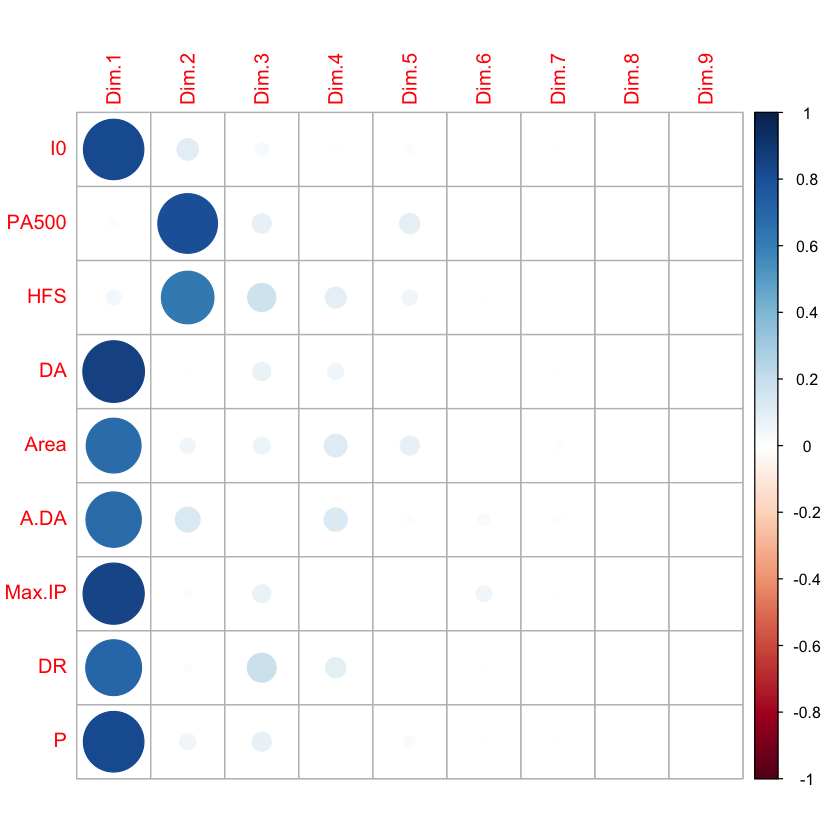

In [51]:
res.var <- get_pca_var(scaled_pca_data)
corrplot(res.var$cos2, is.corr=TRUE) # Quality of representation

Based on the eigenvalues and the explained variance percentages, it is evident that the first two dimensions capture 80.8% of the total variance (60.7% for Dim.1 and 20.1% for Dim.2). The visual representation further confirms that all parameters are well represented within these two dimensions. Additionally, it is important to note that only the first two dimensions have eigenvalues greater than 1, which is a critical criterion for retaining components. Therefore, it is concluded that using two dimensions is the optimal choice for further analyses, as they sufficiently encapsulate the variability in the dataset and meet the eigenvalue criterion.

## Contribution of Variables

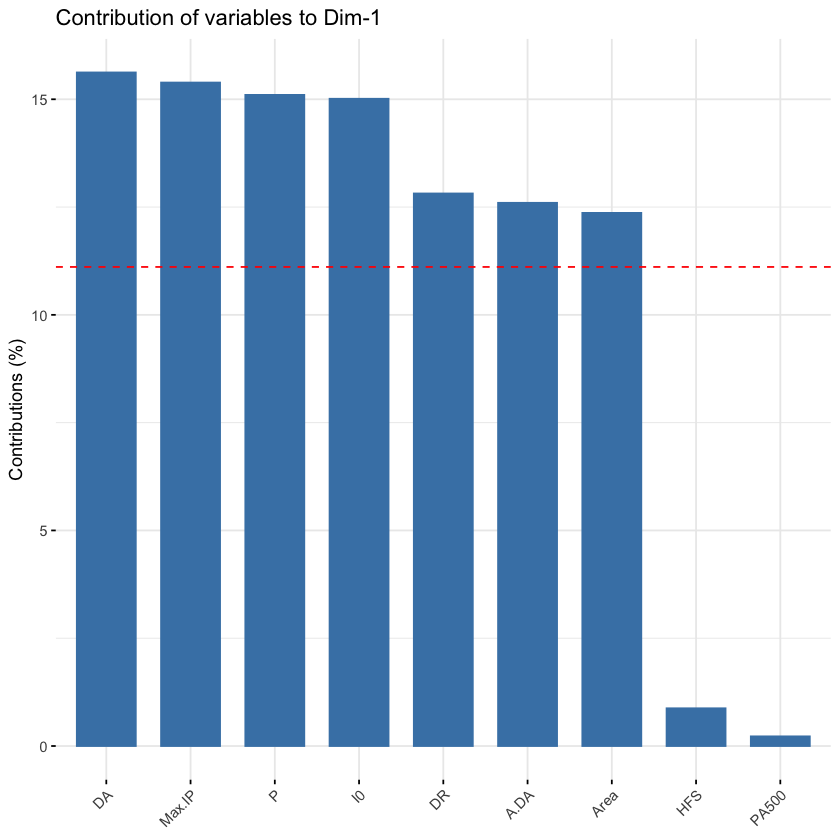

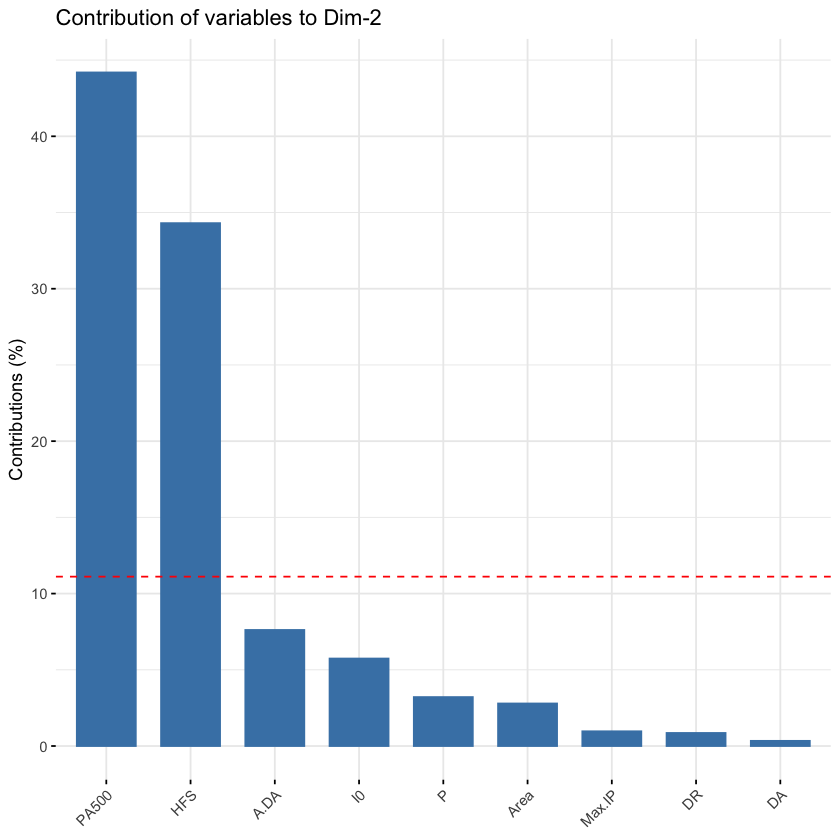

In [52]:
fviz_contrib(scaled_pca_data, choice = "var", axes = 1, top = 9)
fviz_contrib(scaled_pca_data, choice = "var", axes = 2, top = 9)

The first plot shows the contributions of variables to the first principal component (Dim-1). It is evident that DA, Max.IP, P, I0, DR, A.DA, and Area have significant contributions, each exceeding the 10% threshold. These variables are highly influential in defining the first dimension, indicating that they capture most of the variance explained by Dim-1. In contrast, HFS and PA500 contribute much less to Dim-1.

The second plot illustrates the contributions of variables to the second principal component (Dim-2). Here, PA500 and HFS stand out with contributions above 30%, indicating they are the most influential variables in defining Dim-2. Other variables such as A.DA, I0, and P also contribute to some extent, but less significantly. The remaining variables (Area, Max.IP, DR, and DA) have minimal contributions to Dim-2.

Overall, these plots suggest that the first two dimensions are primarily defined by different sets of variables, with DA, Max.IP, and P being crucial for Dim-1, and PA500 and HFS being crucial for Dim-2. This differentiation supports the decision to use these two dimensions for subsequent analyses.

## PCA Biplot of Variables - Cos2

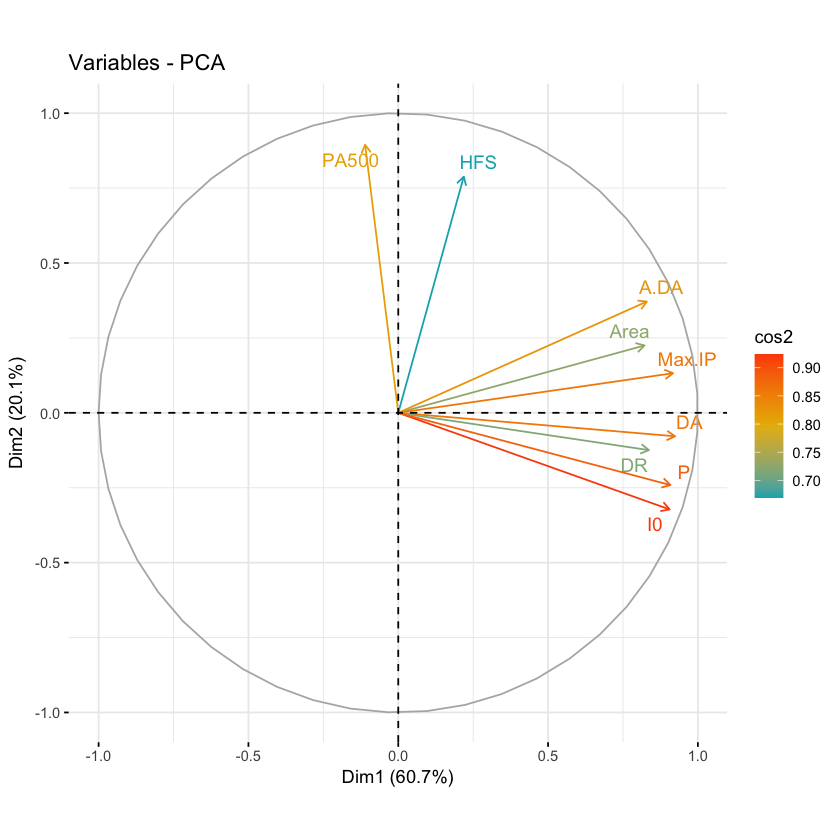

In [53]:
fviz_pca_var(scaled_pca_data, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
)

This PCA biplot illustrates the relationship between variables on the first two principal components (Dim1 and Dim2), explaining 60.7% and 20.1% of the variance, respectively. The length and direction of the arrows indicate the contribution and influence of each variable. The color gradient represents the cos2 values, indicating the quality of representation of the variables on the factor map. Higher cos2 values, as seen in PA500 and HFS for Dim2 and DA, Max.IP, and P for Dim1, signify a better representation of these variables in the respective dimensions.

## PCA Biplot of Variables - Contribution

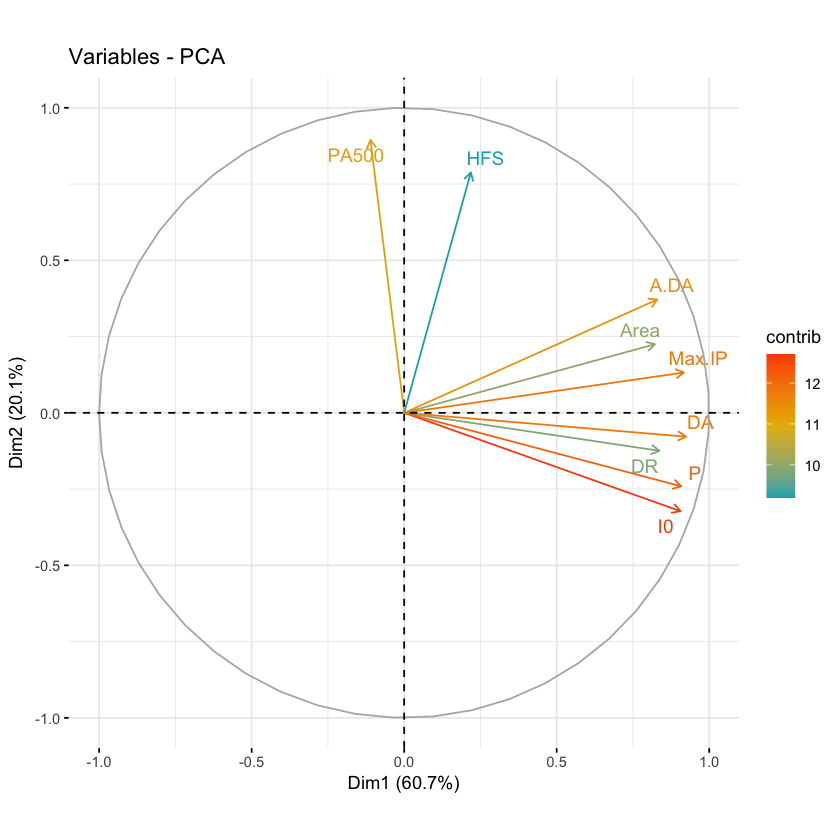

In [54]:
fviz_pca_var(scaled_pca_data,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

This PCA biplot illustrates the relationship between variables on the first two principal components (Dim1 and Dim2), explaining 60.7% and 20.1% of the variance, respectively. The length and direction of the arrows indicate the contribution and influence of each variable. The color gradient represents the contribution (contrib) values, showing the importance of each variable in defining the principal components. Higher contribution values, as seen in PA500 and HFS for Dim2 and DA, Max.IP, and P for Dim1, indicate that these variables have a significant impact on the respective dimensions.

## PCA Biplot of Individuals - Cos2

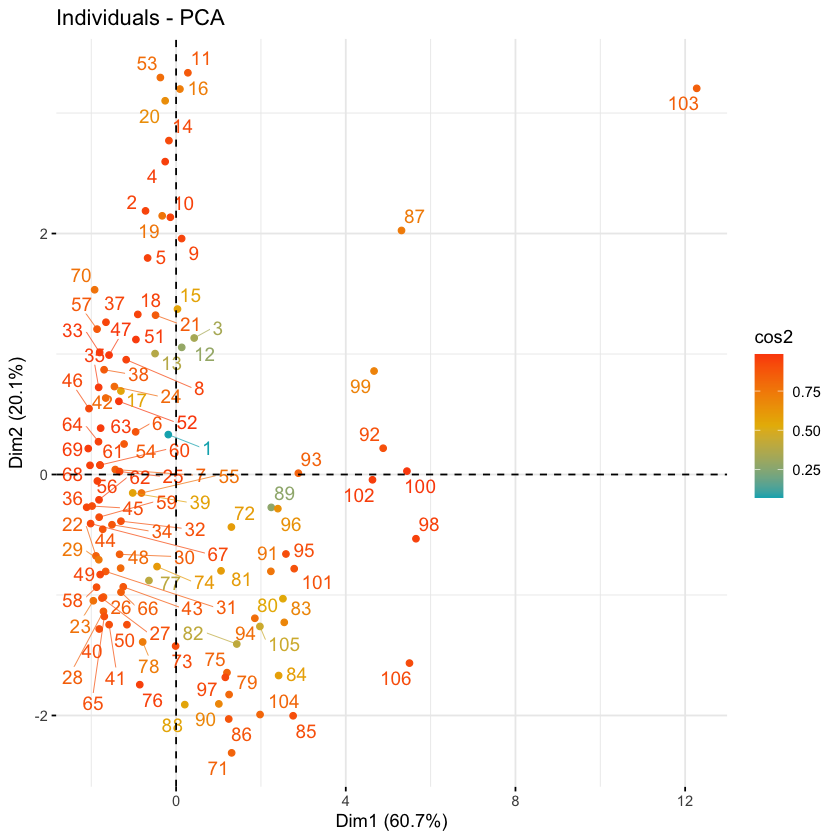

In [55]:
fviz_pca_ind(scaled_pca_data,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

This PCA biplot illustrates the distribution of individual observations on the first two principal components (Dim1 and Dim2), explaining 60.7% and 20.1% of the variance, respectively. Each point represents an individual observation, with the color gradient indicating the cos2 values, which show the quality of representation of each individual on the factor map. Higher cos2 values (closer to red) indicate better representation on the respective dimensions. Observations with low cos2 values (closer to blue) are less well represented in these dimensions. Notably, observations such as 103 and 87 show distinct positions, suggesting they might have unique characteristics compared to the rest of the dataset.

# DISTANCE MATRIX VISUALIZATION¶


In [56]:
pca_dist_eucl <- dist(scaled_pca_data$x[, 1:2], method = "euclidean")
pca_dist_manh <- dist(scaled_pca_data$x[, 1:2], method = "manhattan")

scaled_data <- scale(data[2:10], center = TRUE, scale = TRUE)
scaled_dist_eucl <- dist(scaled_data, method = "euclidean")
scaled_dist_manh <- dist(scaled_data, method = "manhattan")

## Euclidean Distance of PCA Results

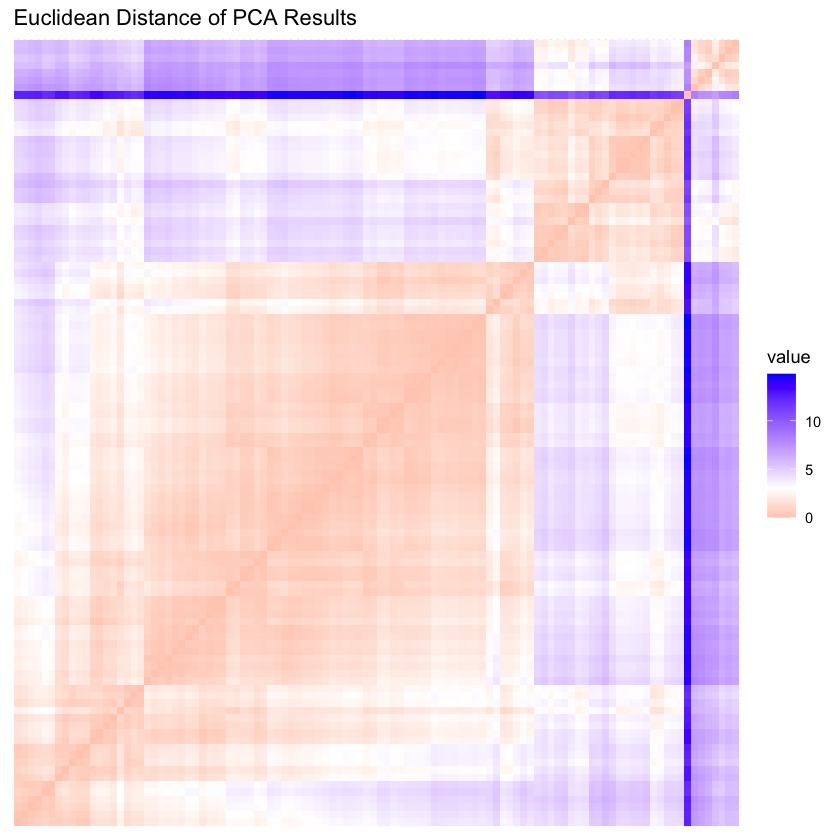

In [57]:
plot1 <- fviz_dist(pca_dist_eucl, show_labels = FALSE) +
  labs(title = "Euclidean Distance of PCA Results") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot1

This heatmap shows more distinct clusters with lower distance values (closer to blue) and clearer separations between clusters.

## Manhattan Distance of PCA Results

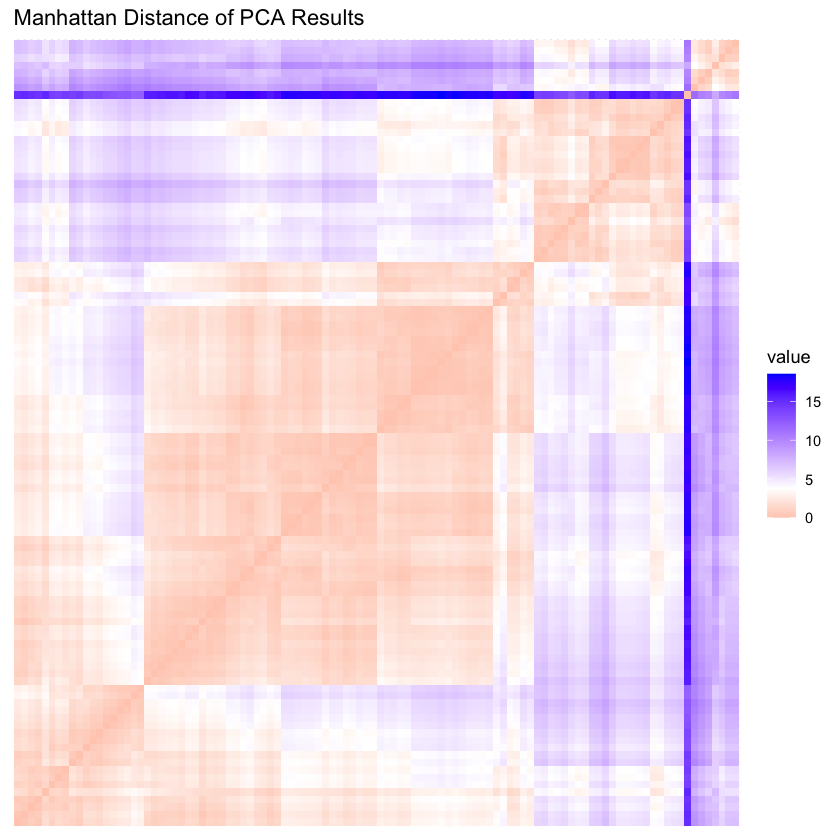

In [58]:
plot2 <- fviz_dist(pca_dist_manh, show_labels = FALSE) +
  labs(title = "Manhattan Distance of PCA Results") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot2

This heatmap also shows some clustering but with higher overall distance values (broader range from blue to red), making it less distinct compared to the Euclidean distance.

## Euclidean Distance of Scaled Data

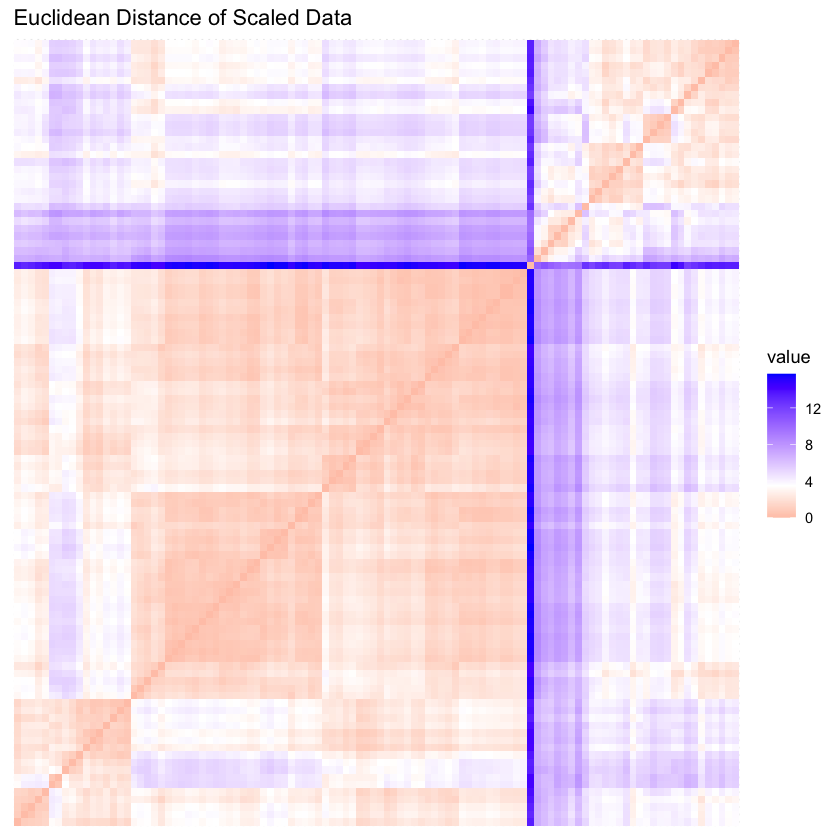

In [59]:
plot3 <- fviz_dist(scaled_dist_eucl, show_labels = FALSE) +
  labs(title = "Euclidean Distance of Scaled Data") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot3

This heatmap exhibits well-defined clusters, similar to the PCA results, indicating good clustering potential.

## Manhattan Distance of Scaled Data

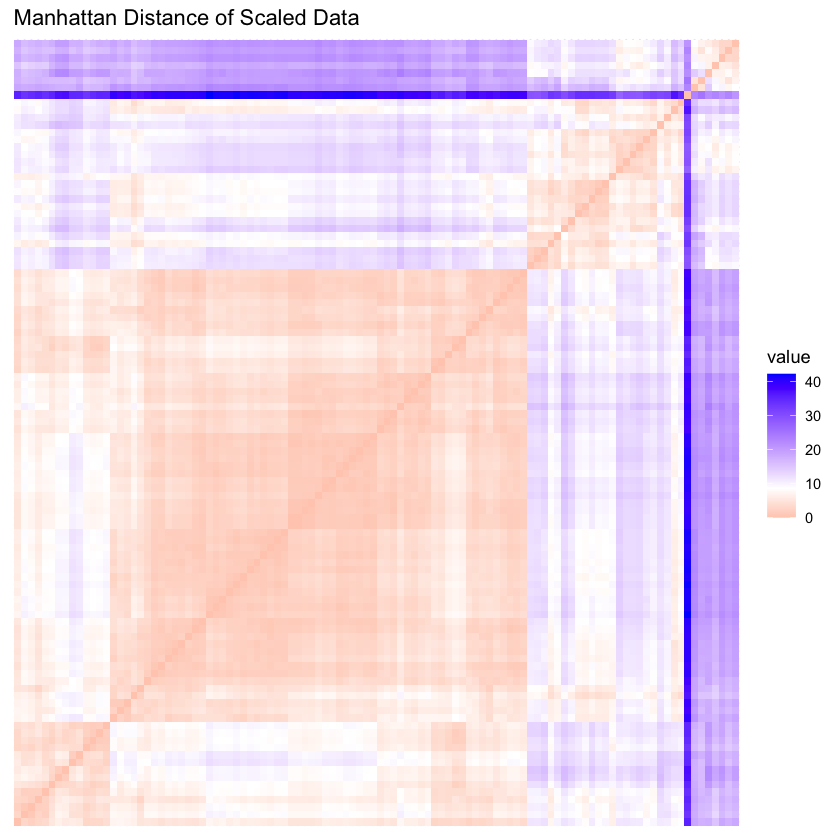

In [60]:
plot4 <- fviz_dist(scaled_dist_manh, show_labels = FALSE) +
  labs(title = "Manhattan Distance of Scaled Data") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank())
plot4

This heatmap shows higher distance values and less clear separation between clusters compared to the Euclidean distance.

# CONCLUSION AND FUTURE WORK

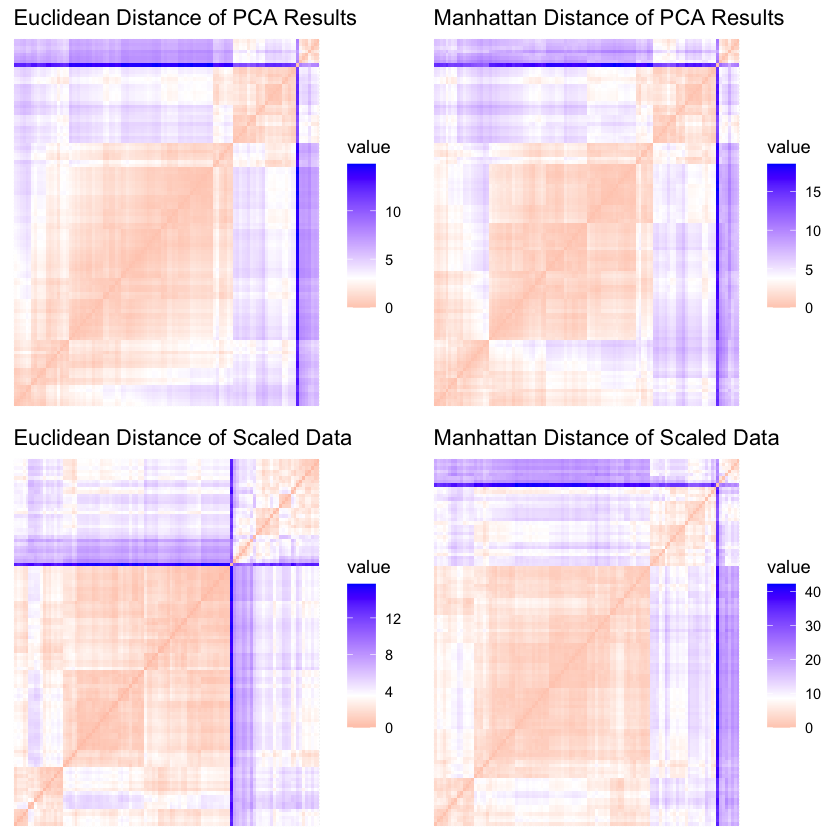

In [61]:
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)


In conclusion, the Euclidean Distance of PCA Results demonstrates the most distinct clustering, with clearer separations and lower distance values, making it more suitable for clustering analysis. However, the Manhattan Distance of Scaled Data also shows reasonable clustering with higher distance values, indicating it can yield successful results in clustering tasks. For future work, the PCA-transformed data combined with Euclidean distance as the distance metric will be utilized in subsequent clustering analyses to ensure clarity and distinctiveness in cluster formation.